# TD 3 | Étude de la marge EGT d'un turboréacteur

---

Objectifs du TD :

* pratiquer sur un premier use case concret d'analyse de données de moteurs d'avion
* fonctions glissantes pandas (_rolling_)
* régression linéaire

---

La table fournie contient les données moteurs disposant de l'information "marge EGT" (egthdm) issue
des rapports ACARS. Il s'agit donc uniquement de rapports extraits au décollage (TAKEOFF). On a
récupéré l'ensemble des rapports des moteurs livrés depuis avril 2016.

## 1. Chargement et nettoyage des données

#### 1.1. Chargez les données ACARS à l'aide de la méthode pandas `read_excel`. Explorez les propriétés générales du jeu de données.

Fichier de données : `./data/accars_b.xlsx`.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
!git clone https://github.com/MadaneA/TDs-statistiques-descriptives.git

fatal: destination path 'TDs-statistiques-descriptives' already exists and is not an empty directory.


In [4]:
import os
os.chdir('TDs-statistiques-descriptives')

In [5]:
# Import des librairies
import pandas as pd

# Lecture du fichier Excel contenant les rapports ACARS
data_path = "./data/accars_b.xlsx"
df = pd.read_excel(data_path)

# Affichage des 5 premières lignes
df.head(1000)



,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
0,CLIMB,186,10,192,1,Neutral,1.0,151.0,6.0,-0.1146,...,88.0,0.57,0.73,0.12,0.13,8.9,5.0,5.0000,5335.0000,0.637
1,CLIMB,186,10,192,1,Neutral,1.0,143.0,7.0,-0.2464,...,90.8,0.58,0.76,0.15,0.10,9.0,5.6,5.6000,4987.0000,0.624
2,CLIMB,186,10,192,1,Neutral,1.0,163.0,8.0,NaN,...,89.0,0.28,0.48,0.16,0.05,10.1,5.0,5.2000,4251.0000,0.530
3,CLIMB,186,10,192,1,Neutral,1.0,152.0,9.0,NaN,...,87.0,0.44,0.67,0.14,0.08,8.9,5.6,5.6000,5356.0000,0.380
4,CLIMB,186,10,192,1,Neutral,1.0,154.0,10.0,NaN,...,85.3,0.26,0.48,0.25,0.06,10.5,5.6,5.6000,NaN,0.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TAKEOFF,77,5,185,2,Neutral,0.0,170.0,177.0,20.8674,...,83.0,0.70,0.60,0.10,0.00,2.1,0.0,0.0441,9107.2960,0.260
996,TAKEOFF,77,5,185,2,Neutral,0.0,171.0,178.0,16.5632,...,74.0,0.30,1.10,0.20,0.00,1.3,0.0,0.0000,9162.4115,0.273
997,TAKEOFF,77,5,185,2,Neutral,0.0,161.0,179.0,29.2539,...,85.0,0.80,0.50,0.10,0.10,3.8,0.0,0.0000,8355.5197,0.249
998,TAKEOFF,77,5,185,2,Neutral,0.0,166.0,180.0,20.6384,...,86.0,0.50,0.90,0.20,0.00,1.7,0.0,0.0000,8434.8861,0.271


#### 1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

In [6]:
# Informations générales
df.info()

# Valeurs manquantes
print('''nombre de valeurs manquante:
''', df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46621 entries, 0 to 46620
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   flight_phase                 46621 non-null  object 
 1   engine_number                46621 non-null  int64  
 2   engine_type                  46621 non-null  int64  
 3   aircraft_number              46621 non-null  int64  
 4   engine_position              46621 non-null  int64  
 5   airline_classif_environment  46137 non-null  object 
 6   brat                         46617 non-null  float64
 7   cas                          34701 non-null  float64
 8   cycles                       16068 non-null  float64
 9   delfn                        46037 non-null  float64
 10  deln1                        46037 non-null  float64
 11  dtamb                        46037 non-null  float64
 12  egthdm                       45270 non-null  float64
 13  iai             

#### 1.3. Ne gardez que les lignes où le nombre de cycles (variable `cycles`) et la marge EGT (variable `egthdm`) sont présentes.

In [7]:
# On garde uniquement les lignes où 'cycles' et 'egthdm' ne sont pas NaN
df = df[df["cycles"].notna() & df["egthdm"].notna()]

# Vérification rapide
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15374 entries, 104 to 46600
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   flight_phase                 15374 non-null  object 
 1   engine_number                15374 non-null  int64  
 2   engine_type                  15374 non-null  int64  
 3   aircraft_number              15374 non-null  int64  
 4   engine_position              15374 non-null  int64  
 5   airline_classif_environment  14890 non-null  object 
 6   brat                         15374 non-null  float64
 7   cas                          14442 non-null  float64
 8   cycles                       15374 non-null  float64
 9   delfn                        15374 non-null  float64
 10  deln1                        15374 non-null  float64
 11  dtamb                        15374 non-null  float64
 12  egthdm                       15374 non-null  float64
 13  iai                

#### 1.4. Affichez les différents types de moteurs (indice : utilisez la méthode `unique()`).

In [8]:
# Affichage des types de moteurs présents dans le jeu de données
df["engine_type"].unique()


array([10,  5,  7])

#### 1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

In [9]:
# On filtre uniquement les moteurs de type 10
df_type10 = df[df["engine_type"] == 10]

# Vérifions combien d'avions distincts
nb_avions = df_type10["aircraft_number"].nunique()
print("Nombre d'avions distincts :", nb_avions)

# Calcul du nombre de vols par avion (2 moteurs = 2 lignes par vol)
vols_par_avion = (
    df_type10.groupby("aircraft_number")["engine_number"].count() / 2
).astype(int)

print("\nNombre de vols par avion :")
print(vols_par_avion)


Nombre d'avions distincts : 5

Nombre de vols par avion :
aircraft_number
11      17
14      97
190    110
191      6
192    126
Name: engine_number, dtype: int64


## 2. Étude de la marge EGT de l'avion 190

#### 2.1. Récupérez les variables `engine_number`, nombre de cycles (`cycles`) et marge EGT (`egthdm`) pour l'avion identifié par le numéro 190.

In [10]:
# Sélection de l'avion 190
avion190 = df[df["aircraft_number"] == 190]

# On garde seulement les colonnes utiles
avion190 = avion190[["engine_number", "cycles", "egthdm"]]

# Vérification du résultat
avion190.head()


,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11399,180,69.0,57.6415
11400,180,75.0,48.7217
11755,179,0.0,37.6572
11756,179,1.0,37.2208


#### 2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

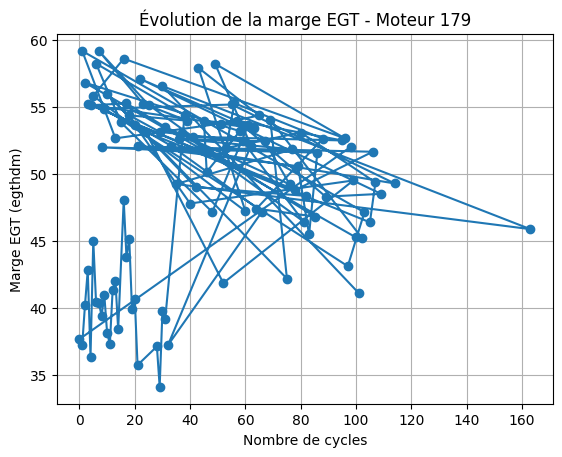

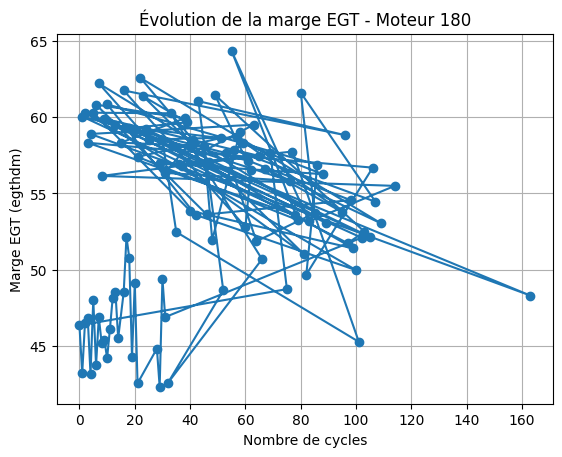

In [11]:
# On récupère les numéros de moteurs de l'avion 190
moteurs = avion190['engine_number'].unique()

# Création d'un graphique pour chaque moteur:
for moteur in moteurs:
    data_moteur = avion190[avion190['engine_number'] == moteur]
    plt.figure()
    plt.plot(data_moteur['cycles'], data_moteur['egthdm'], marker='o')
    plt.title(f"Évolution de la marge EGT - Moteur {moteur}")
    plt.xlabel("Nombre de cycles")
    plt.ylabel("Marge EGT (egthdm)")
    plt.grid (True)
    plt.show()

#### 2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

In [12]:
# Sélection du moteur 179 pour l'avion 190
moteur179 = avion190[avion190["engine_number"] == 179].sort_values("cycles")

# Affichage pour vérification
display(moteur179.head())

# On vérifie la continuité des cycles
# Si le moteur a volé n fois, les cycles doivent être consécutifs
# La différence entre deux cycles consécutifs devrait être 1
moteur179["diff_cycles"] = moteur179["cycles"].diff()

# Nombre de vols manquants : somme des écarts supérieurs à 1
vols_manquants = int((moteur179["diff_cycles"] - 1).clip(lower=0).sum())

print(f"Nombre de vols manquants pour le moteur 179 : {vols_manquants}")


,engine_number,cycles,egthdm
11755,179,0.0,37.6572
11756,179,1.0,37.2208
30796,179,1.0,59.1796
11757,179,2.0,40.2041
25359,179,2.0,56.8104


Nombre de vols manquants pour le moteur 179 : 73


#### 2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable `egthdm` mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par `NaN`. Pour cela, effectuez l'exercice suivant:

1. Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.
2. Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [13]:
# 1. Agrégation : on garde la plus grande valeur de egthdm pour chaque cycle
egt = moteur179.groupby("cycles")["egthdm"].max()

# 2. Réindexation : on crée un index continu allant du min au max des cycles
full_index = range(int(egt.index.min()), int(egt.index.max()) + 1)
egt = egt.reindex(full_index)

# Affichage du résultat
egt.head()


cycles
0    37.6572
1    59.1796
2    56.8104
3    55.2263
4    55.1283
Name: egthdm, dtype: float64

#### 2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling

Utilisez une fenêtre glissante de taille 15 cycles, avec un minimum de 3 observations non-nulles par fenêtre (paramètre `min_periods`).

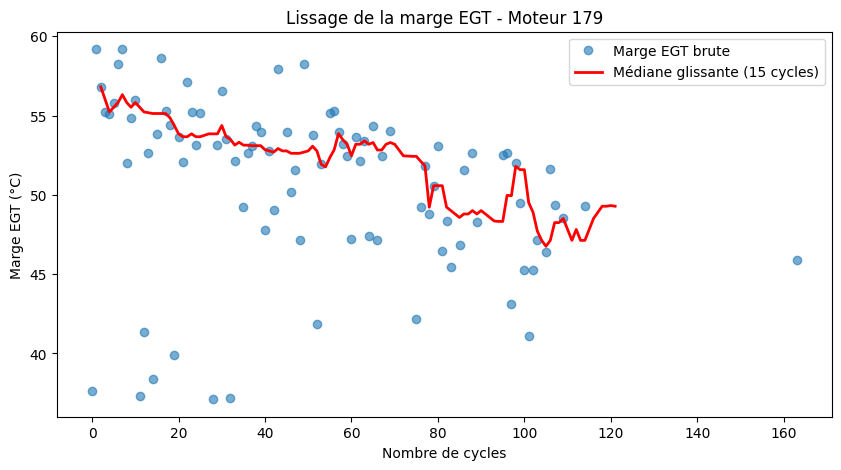

In [14]:
# Calcul de la médiane glissante sur 15 cycles
egt_lisse = egt.rolling(window=15, min_periods=3).median()

# Visualisation
plt.figure(figsize=(10,5))
plt.plot(egt.index, egt, 'o', label='Marge EGT brute', alpha=0.6)
plt.plot(egt_lisse.index, egt_lisse, color='red', linewidth=2, label='Médiane glissante (15 cycles)')
plt.title("Lissage de la marge EGT - Moteur 179")
plt.xlabel("Nombre de cycles")
plt.ylabel("Marge EGT (°C)")
plt.legend()
plt.show()


#### 2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1. Calculez une série ne contenant que les valeurs décroissantes de la amrge EGT lissée.
2. Sur le graphique précédent, ajoutez ces points par-dessus la courbe.

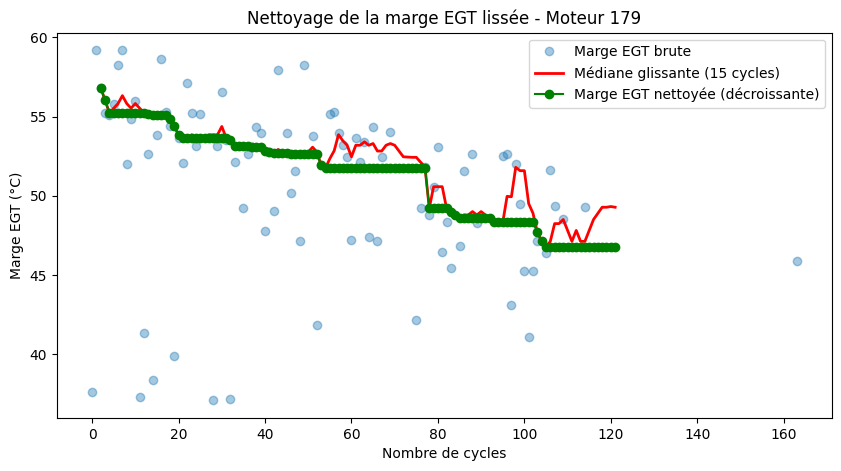

In [15]:
# On part de la marge EGT lissée
egt_clean = egt_lisse.copy()

# 1. On impose la décroissance : chaque valeur ne peut être supérieure à la précédente
for i in range(1, len(egt_clean)):
    if pd.notna(egt_clean.iloc[i]) and pd.notna(egt_clean.iloc[i-1]):
        if egt_clean.iloc[i] > egt_clean.iloc[i-1]:
            egt_clean.iloc[i] = egt_clean.iloc[i-1]

# 2. Visualisation : on ajoute ces points sur le graphique précédent
plt.figure(figsize=(10,5))
plt.plot(egt.index, egt, 'o', alpha=0.4, label='Marge EGT brute')
plt.plot(egt_lisse.index, egt_lisse, color='red', linewidth=2, label='Médiane glissante (15 cycles)')
plt.plot(egt_clean.index, egt_clean, 'o-', color='green', label='Marge EGT nettoyée (décroissante)')
plt.title("Nettoyage de la marge EGT lissée - Moteur 179")
plt.xlabel("Nombre de cycles")
plt.ylabel("Marge EGT (°C)")
plt.legend()
plt.show()


#### 2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle `LinearRegression` de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :
```python
lr = LinearRegression()
model = lr.fit(X, y)
```

1. Apprenez un modèle `LinearRegression` sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (_intercept_) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété `values`)
2. Tracez la droite obtenue sur le graphe précédent.

Pente estimée : -0.080520 °C / cycle
Ordonnée à l'origine : 56.19 °C


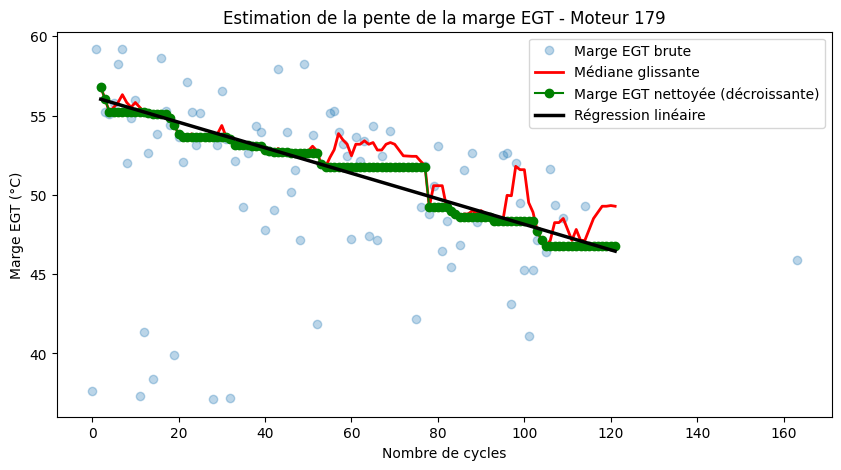

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Suppression des valeurs manquantes (NaN)
mask = egt_clean.notna()
X = egt_clean.index[mask].values.reshape(-1, 1)
y = egt_clean.values[mask]

# 1. Ajustement du modèle de régression linéaire
lr = LinearRegression()
model = lr.fit(X, y)

# Coefficients du modèle
a = model.coef_[0]        # pente
b = model.intercept_      # ordonnée à l'origine

print(f"Pente estimée : {a:.6f} °C / cycle")
print(f"Ordonnée à l'origine : {b:.2f} °C")

# 2. Prédiction de la droite de régression
y_pred = model.predict(X)

# 3. Visualisation
plt.figure(figsize=(10,5))
plt.plot(egt.index, egt, 'o', alpha=0.3, label='Marge EGT brute')
plt.plot(egt_lisse.index, egt_lisse, color='red', linewidth=2, label='Médiane glissante')
plt.plot(egt_clean.index, egt_clean, 'o-', color='green', label='Marge EGT nettoyée (décroissante)')
plt.plot(X, y_pred, color='black', linewidth=2.5, label='Régression linéaire')
plt.title("Estimation de la pente de la marge EGT - Moteur 179")
plt.xlabel("Nombre de cycles")
plt.ylabel("Marge EGT (°C)")
plt.legend()
plt.show()


### 3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

```python
def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs
```

In [17]:
def regress_egt_margin(df_acars):
    """
    Calcule la pente et l'intercept de la marge EGT pour chaque moteur.

    Paramètres
    ----------
    df_acars : DataFrame
        Jeu de données ACARS contenant au moins les colonnes :
        ['engine_number', 'cycles', 'egthdm']

    Retour
    ------
    df_regress_models : DataFrame
        Contient les coefficients (pente et intercept) pour chaque moteur.
    """

    from sklearn.linear_model import LinearRegression
    import numpy as np
    import pandas as pd

    results = []  # liste pour stocker les résultats moteur par moteur

    # Liste unique des moteurs
    moteurs = df_acars["engine_number"].unique()

    for moteur in moteurs:
        df_m = df_acars[df_acars["engine_number"] == moteur].copy()

        # --- Nettoyage des données ---
        # On garde la valeur max de egthdm par cycle
        egt = df_m.groupby("cycles")["egthdm"].max()

        # Réindexation sur tous les cycles
        full_index = range(int(egt.index.min()), int(egt.index.max()) + 1)
        egt = egt.reindex(full_index)

        # --- Lissage médian sur 15 cycles ---
        egt_lisse = egt.rolling(window=15, min_periods=3).median()

        # --- Correction décroissante ---
        egt_clean = egt_lisse.copy()
        for i in range(1, len(egt_clean)):
            if pd.notna(egt_clean.iloc[i]) and pd.notna(egt_clean.iloc[i-1]):
                if egt_clean.iloc[i] > egt_clean.iloc[i-1]:
                    egt_clean.iloc[i] = egt_clean.iloc[i-1]

        # --- Régression linéaire ---
        mask = egt_clean.notna()
        if mask.sum() >= 2:  # au moins 2 points valides
            X = np.array(egt_clean.index[mask]).reshape(-1, 1)
            y = egt_clean.values[mask]

            lr = LinearRegression()
            lr.fit(X, y)

            pente = lr.coef_[0]
            intercept = lr.intercept_
        else:
            pente = np.nan
            intercept = np.nan

        # Stockage du résultat
        results.append({
            "engine_number": moteur,
            "pente": pente,
            "intercept": intercept
        })

    # Conversion en DataFrame final
    df_regress_models = pd.DataFrame(results)
    return df_regress_models


In [18]:
# Application de la fonction sur le DataFrame complet
df_models = regress_egt_margin(df)

# Aperçu des résultats
df_models.head()


,engine_number,pente,intercept
0,186,-0.012716,54.641491
1,187,-0.032181,57.599717
2,184,-0.053483,45.512010
3,188,-0.037752,59.241086
4,1,-0.116532,92.174649


### 4. Comparaison de l'usure des 3 types de moteurs

#### 4.1. Prédiction de la marge EGT au 150ème par type de moteur

1. Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode `apply`).
2. Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
3. Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?

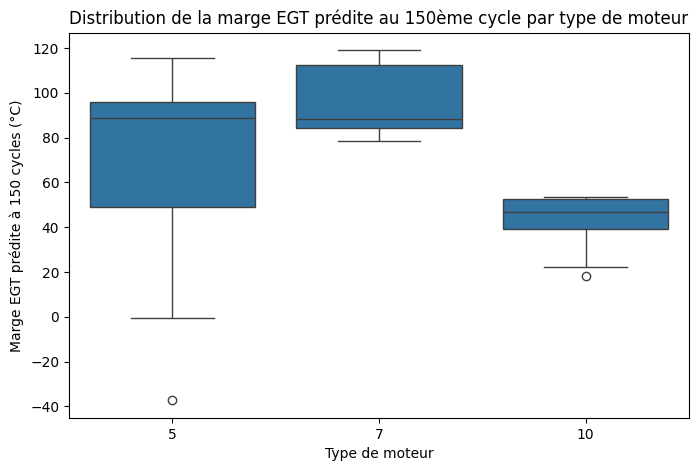

Marge EGT moyenne au 150ème cycle par type de moteur :
engine_type
7     95.666588
5     76.257872
10    42.734327
Name: egt_150, dtype: float64

Le type de moteur avec la plus grande marge moyenne après 150 cycles est : 7


In [19]:
# 1. Prédiction de la marge EGT à 150 cycles pour chaque moteur
df_models["egt_150"] = df_models.apply(lambda row: row["pente"] * 150 + row["intercept"], axis=1)

# On ajoute l'information du type de moteur depuis le DataFrame d'origine
df_models = df_models.merge(df[["engine_number", "engine_type"]].drop_duplicates(), on="engine_number", how="left")

# 2. Représentation graphique (box plot par type de moteur)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_models, x="engine_type", y="egt_150")
plt.title("Distribution de la marge EGT prédite au 150ème cycle par type de moteur")
plt.xlabel("Type de moteur")
plt.ylabel("Marge EGT prédite à 150 cycles (°C)")
plt.show()

# 3. Moyenne par type de moteur
mean_by_type = df_models.groupby("engine_type")["egt_150"].mean().sort_values(ascending=False)
print("Marge EGT moyenne au 150ème cycle par type de moteur :")
print(mean_by_type)
print("\nLe type de moteur avec la plus grande marge moyenne après 150 cycles est :", mean_by_type.idxmax())


#### 4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1. Quelle est son unité ?
2. Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
3. Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?

L’unité de la pente est : degré Celsius par cycle (°C/cycle)


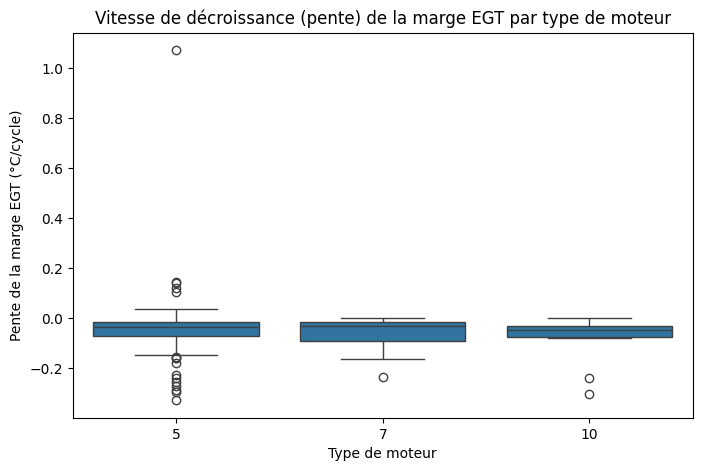

Moyenne de la pente (vitesse d’usure) par type de moteur :
engine_type
10   -0.087221
7    -0.057895
5    -0.045602
Name: pente, dtype: float64

Le type de moteur avec la plus faible vitesse d’usure (pente la moins négative) est : 5


In [20]:
# 1. Unité de la pente
print("L’unité de la pente est : degré Celsius par cycle (°C/cycle)")

# 2. Boxplot de la pente par type de moteur
plt.figure(figsize=(8,5))
sns.boxplot(data=df_models, x="engine_type", y="pente")
plt.title("Vitesse de décroissance (pente) de la marge EGT par type de moteur")
plt.xlabel("Type de moteur")
plt.ylabel("Pente de la marge EGT (°C/cycle)")
plt.show()

# 3. Moyenne de la pente par type de moteur
mean_slope_by_type = df_models.groupby("engine_type")["pente"].mean().sort_values()
print("Moyenne de la pente (vitesse d’usure) par type de moteur :")
print(mean_slope_by_type)
print("\nLe type de moteur avec la plus faible vitesse d’usure (pente la moins négative) est :", mean_slope_by_type.idxmax())


**Analyse du boxplot**

On observe sur le graphique ci-dessus la répartition de la pente de la marge EGT (exprimée en °C/cycle) pour chaque type de moteur.

- Globalement, toutes les pentes sont **proches de zéro** ou **légèrement négatives**, ce qui est cohérent avec l’idée que la marge EGT **diminue lentement** au fil des cycles.
- Quelques moteurs présentent des **valeurs positives anormales** (outliers au-dessus de 0), probablement dues à des anomalies de mesure ou à un **nettoyage moteur (waterwash)** qui restaure partiellement la marge EGT.
- Le **type de moteur 10** semble avoir les pentes les **plus stables** et légèrement **moins négatives** que les moteurs 5 et 7.
- À l’inverse, le **type 5** présente une plus grande variabilité avec plusieurs moteurs à pente fortement négative, indiquant une **usure plus rapide**.

**Conclusion :**
Le **type de moteur 10** présente en moyenne la **plus faible vitesse de décroissance** de la marge EGT, donc **une meilleure résistance à l’usure**.  
Les moteurs de type **5** semblent les plus sensibles à la dégradation thermique.
